In [1]:
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

2022-12-09 23:23:08.914471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 23:23:09.134994: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 23:23:09.135022: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 23:23:09.888782: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
from sklearn import datasets
data = datasets.load_iris()

In [3]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [7]:
x=df.drop(['target'],axis=1)
y=df['target']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [8]:
from sklearn.model_selection import train_test_split ,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


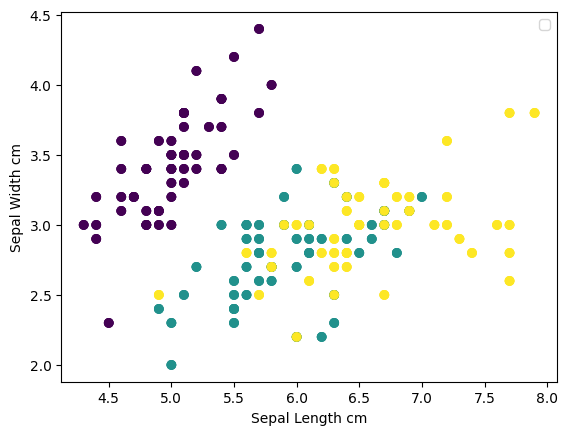

In [9]:

for i in  range(3):
    plt.scatter(x['sepal length (cm)'],x['sepal width (cm)'],c=y)

plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend()

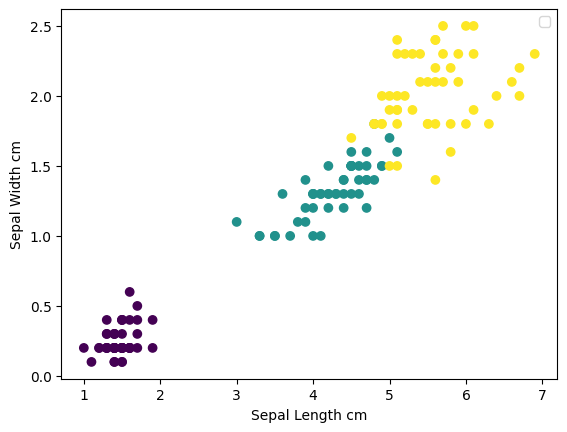

In [10]:
plt.scatter(x['petal length (cm)'],x['petal width (cm)'],c=y)
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend('')

<AxesSubplot: >

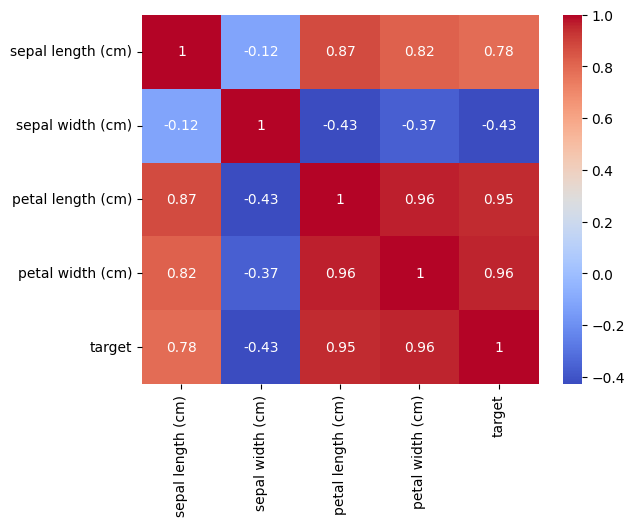

In [11]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [13]:
model1=RandomForestClassifier()
model2=SVC(kernel='rbf')
model3=XGBClassifier()

In [14]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

In [15]:
print("MOdel 1 : Random Forest Classifier Score - ",model1.score(x_test,y_test))
print("MOdel 2 : Support Vector Classifier Score - ",model2.score(x_test,y_test))
print("MOdel 3 : XGBoost Classifier Score - ",model3.score(x_test,y_test))

MOdel 1 : Random Forest Classifier Score -  0.9
MOdel 2 : Support Vector Classifier Score -  0.9666666666666667
MOdel 3 : XGBoost Classifier Score -  0.9


##Concluding here SVM has highest Score of 96.67% 

In [20]:
from sklearn.metrics import classification_report
print("MOdel 1 : Random Forest Classifier Score - \n",classification_report(y_test,pred1))
print("MOdel 2 : Support Vector Classifier Score - \n",classification_report(y_test,pred2))
print("MOdel 3 : XGBoost Classifier Score - \n",classification_report(y_test,pred3))


MOdel 1 : Random Forest Classifier Score - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      0.92      0.89        13
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

MOdel 2 : Support Vector Classifier Score - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

MOdel 3 : XGBoost Classifier Score - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7